# Section 1 Project
목표
- 다음 분기에 어떤 게임을 설계해야 할까  

<br/>

목차  
0. 데이터 설명
1. 지역에 따라서 선호하는 게임 장르가 다를까
2. 연도별 게임의 트렌드가 있을까
    - 연도가 가까울수록 트렌드가 비슷할까
3. 출고량이 높은 게임에 대한 분석 및 설계 게임 제안


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

pd.options.display.max_rows = 1000  # DataFrame 보여주는 max row값 설정

In [2]:
df = pd.read_csv('./data/vgames2.csv', index_col=0)
df.head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


# 데이터 전처리

In [3]:
df.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

## 1. Sales 데이터 float type으로 바꾸기

In [4]:
def to_numeric(string):
    '''sales column의 -K, -M이 붙은 데이터를 단위에 맞게 변환하고 수치형으로 바꾸어준다.'''
    if string[-1] == 'K':
        string = float(string.replace('K', '')) / 1000
    else:
        string = float(string.replace('M', ''))
    return string

sales_col = df.columns[-4:]

# apply method로 sale column 데이터 float 타입으로 변환
for column in sales_col:
    df[column] = df[column].apply(to_numeric)

In [5]:
df.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

### 전체 Sales 합계 column 추가(`Whole_Sales`)

In [6]:
df['Whole_Sales'] = df[sales_col].sum(axis=1)
df.head(2)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Whole_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.0,0.0,0.00,0.04
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.0,0.0,0.01,0.18


## 2. Year Column 데이터 양식 통일
메모
- 2020년도 게임 하나는 사실 2009년 출시 게임이다.(잘못 기입된 것으로 판단. 삭제)

In [7]:
def year_to_4_digit(year):
    '''년도 표기 형식이 두 자리(ex. 17년)인 데이터를 네 자리로 바꾸어준다.'''
    if year < 100:
        if year < 20:
            return year + 2000
        else:
            return year + 1900
    else:
        return year

df['Year'] = df['Year'].apply(year_to_4_digit)
df = df.drop(df[df.Year == 2020].index) # 2020년 출시 게임 삭제
df.Year.unique()

array([2008., 2009., 2010., 2005., 2011., 2007., 2001., 2003., 2006.,
       2014., 2015., 2002., 1997., 2013., 1996., 2004., 2000.,   nan,
       1984., 1998., 2016., 1985., 1999., 1995., 1993., 2012., 1987.,
       1982., 1994., 1990., 1992., 1991., 1983., 1988., 1981., 1989.,
       1986., 2017., 1980.])

## 3. 결측치 처리
- 결측치는 전부 drop한다.

In [8]:
df = df.dropna()
df.isna().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
Whole_Sales    0
dtype: int64

# 필수컨텐츠 1 : 지역에 따라서 선호하는 게임 장르가 다를까?
- 데이터 정보 : 12개의 장르가 있고, 4개의 지역이 있다.
- 데이터 분석 방향 : 지역에 따라 판매된 장르의 분포가 어떻게 다를 것인가?
<br/><br/>

In [9]:
# 원본 지킴이
df_for_genre = df

# 장르에 따라 groupby 후 장르별 판매량 함계
df_sales_for_genre_n_region = df_for_genre.groupby(by='Genre').sum()[sales_col]
df_sales_for_genre_n_region

# 지역에 따른 장르별 판매량 비율(%)
df_sales_for_genre_n_region_ratio = round((df_sales_for_genre_n_region/df_sales_for_genre_n_region.sum()) * 100, 2)
df_sales_for_genre_n_region_ratio

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,19.94,21.46,12.32,23.49
Adventure,2.36,2.66,4.08,2.13
Fighting,5.12,4.17,6.85,4.61
Misc,9.17,8.70,8.19,9.27
Platform,10.34,8.38,10.27,6.57
Puzzle,2.82,2.11,4.42,1.59
Racing,8.24,9.82,4.43,9.77
Role-Playing,7.40,7.65,26.97,7.24
Shooter,13.34,12.96,3.00,13.00


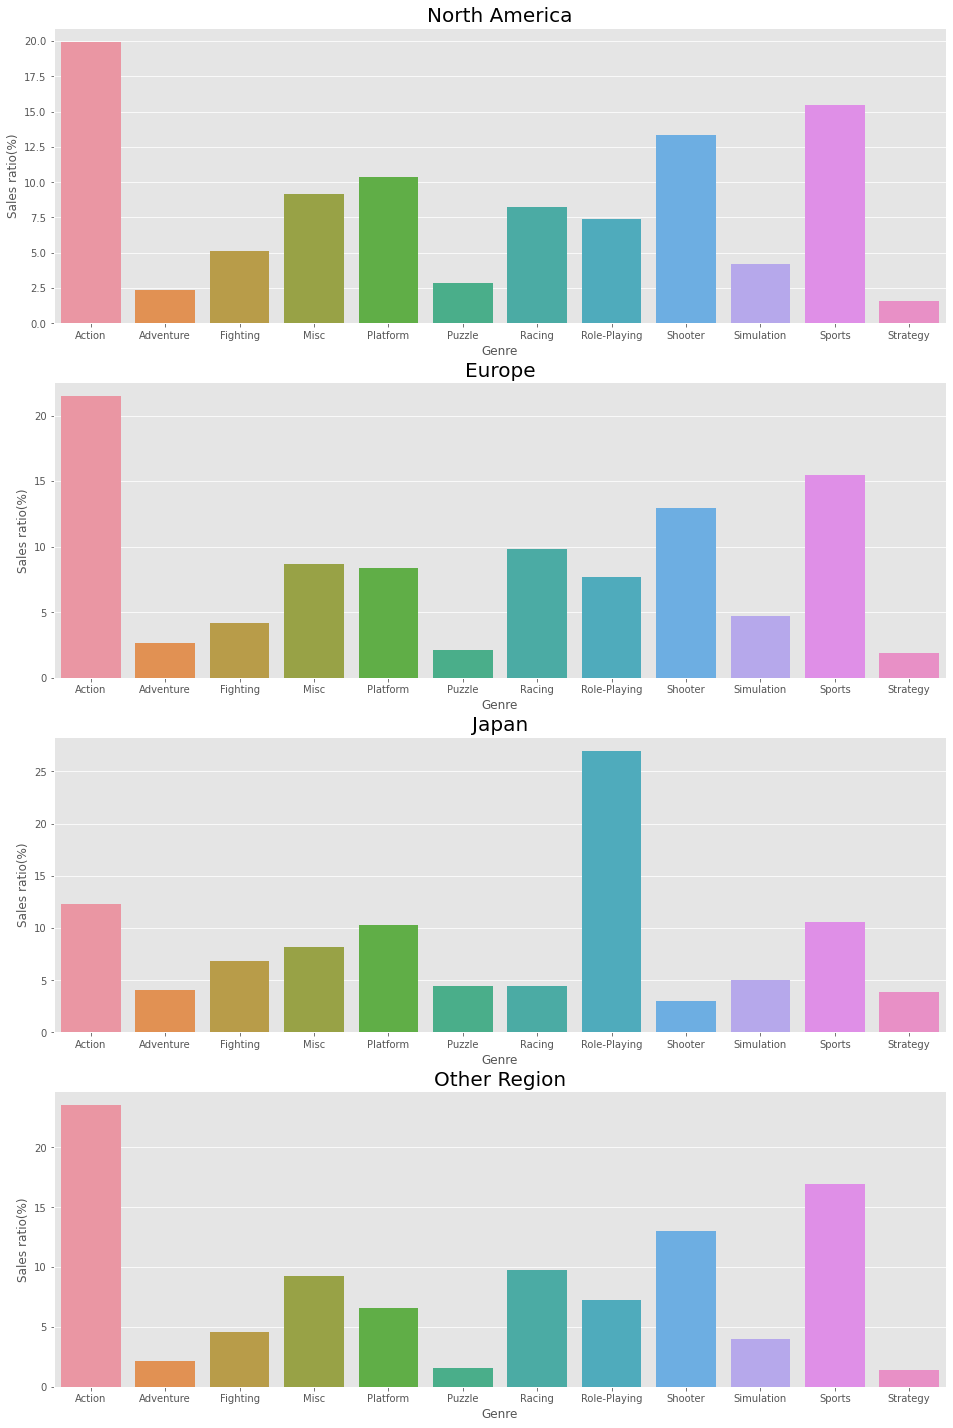

In [10]:
# 국가에 따른 장르별 판매량
fig, (ax1, ax2, ax3, ax4) = plt.subplots(figsize=(16,25), nrows=4)
sns.barplot(x = df_sales_for_genre_n_region_ratio.index
            , y = df_sales_for_genre_n_region_ratio['NA_Sales'], ax = ax1)
sns.barplot(x = df_sales_for_genre_n_region_ratio.index
            , y = df_sales_for_genre_n_region_ratio['EU_Sales'], ax = ax2)
sns.barplot(x = df_sales_for_genre_n_region_ratio.index
            , y = df_sales_for_genre_n_region_ratio['JP_Sales'], ax = ax3)
sns.barplot(x = df_sales_for_genre_n_region_ratio.index
            , y = df_sales_for_genre_n_region_ratio['Other_Sales'], ax = ax4)
ax1.set_title('North America', fontsize=20)
ax1.set_ylabel('Sales ratio(%)')
ax2.set_title('Europe', fontsize=20)
ax2.set_ylabel('Sales ratio(%)')
ax3.set_title('Japan', fontsize=20)
ax3.set_ylabel('Sales ratio(%)')
ax4.set_title('Other Region', fontsize=20)
ax4.set_ylabel('Sales ratio(%)')
plt.show()

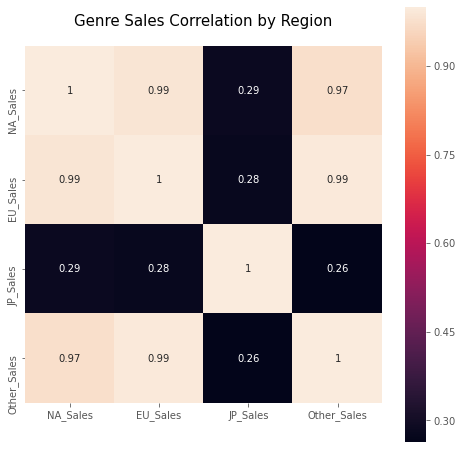

In [11]:
# 지역들 끼리의 판매 장르 상관관계
plt.figure(figsize=(8,8))
sns.heatmap(df_sales_for_genre_n_region_ratio.corr(), square=True, annot=True)
plt.title('Genre Sales Correlation by Region', fontsize=15, pad=20)
plt.show()

In [12]:
# 일본을 제외한 세 지역(미국, 유럽, 그 외)의 분포가 같은지 확인
pval_of_genre_region_distbut = stats.chi2_contingency(df_sales_for_genre_n_region_ratio.drop(columns=['JP_Sales']))[1]
print('귀무가설 : 일본을 제외한 미국, 유럽, 그 외 지역의 장르별 판매량 분포는 같다.')
print('일본지역을 제외한 chi^2 test 결과 p-value : {}'.format(pval_of_genre_region_distbut))
print('-> p-value가 0.05보다 크기 때문에 귀무가설을 기각할 수 없다. 즉, 세 지역의 장르별 판매량 분포는 같다')

귀무가설 : 일본을 제외한 미국, 유럽, 그 외 지역의 장르별 판매량 분포는 같다.
일본지역을 제외한 chi^2 test 결과 p-value : 0.9999999861124647
-> p-value가 0.05보다 크기 때문에 귀무가설을 기각할 수 없다. 즉, 세 지역의 장르별 판매량 분포는 같다


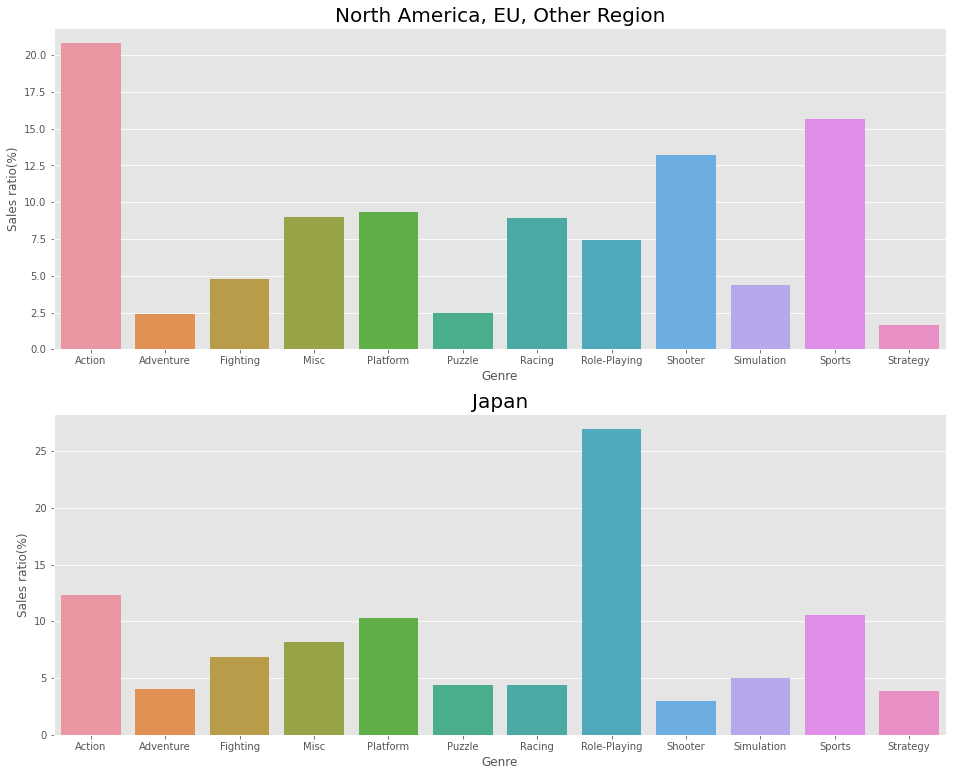

일본과 그 외 국가의 장르별 판매량이 확연히 다른 것을 확인 가능
일본 지역의 경우 Role-Playing 장르의 판매가 두드러짐


In [13]:
# 일본과 그 외 국가의 장르별 판매량
df_sales_genre_ratio_except_jp = round(df_sales_for_genre_n_region.drop(columns=['JP_Sales']).sum(axis=1) / df_sales_for_genre_n_region.drop(columns=['JP_Sales']).sum(axis=1).sum() * 100, 2)
df_sales_genre_ratio_except_jp.name = 'Except_JP'

fig, (ax1, ax2) = plt.subplots(figsize=(16,13), nrows=2)
sns.barplot(x = df_sales_genre_ratio_except_jp.index
            , y = df_sales_genre_ratio_except_jp, ax = ax1)
sns.barplot(x = df_sales_for_genre_n_region_ratio.index
            , y = df_sales_for_genre_n_region_ratio['JP_Sales'], ax = ax2)

ax1.set_title('North America, EU, Other Region', fontsize=20)
ax1.set_ylabel('Sales ratio(%)')
ax2.set_title('Japan', fontsize=20)
ax2.set_ylabel('Sales ratio(%)')
plt.show()

print('일본과 그 외 국가의 장르별 판매량이 확연히 다른 것을 확인 가능')
print('일본 지역의 경우 Role-Playing 장르의 판매가 두드러짐')

In [14]:
# 일본과 일본을 제외한 지역의 장르별 판매량 분포 chi^2 검정
pval_of_genre_region_distbut = stats.chi2_contingency(pd.concat([df_sales_for_genre_n_region_ratio.JP_Sales, df_sales_genre_ratio_except_jp], axis=1))[1]
print('귀무가설 : 일본과 일본을 제외한 지역의 장르별 판매량 분포는 같다.')
print('일본과 일본을 제외한 지역의 장르별 판매량 chi^2 test 결과 p-value : {}'.format(pval_of_genre_region_distbut))
print('-> p-value가 0.05보다 작기 때문에 귀무가설을 기각한다. 즉, 일본과 일본을 제외한 지역의 장르별 판매량 분포는 다르다고 볼 수 있다.')
print()
print('''*결론
1. 미국, 유럽, 그 외 지역은 선호하는 게임 장르가 유사하다.
2. 일본 지역은 다른 지역들과 선호하는 게임 장르가 다르다.
-> 따라서 어떤 게임 장르를 개발하느냐에 따라 지역별 판매실적이 달라질 수 있으므로, 판매지역 설정 시 현재 개발 중인 장르를 고려하여 설정한다.''')

귀무가설 : 일본과 일본을 제외한 지역의 장르별 판매량 분포는 같다.
일본과 일본을 제외한 지역의 장르별 판매량 chi^2 test 결과 p-value : 0.010949145658986751
-> p-value가 0.05보다 작기 때문에 귀무가설을 기각한다. 즉, 일본과 일본을 제외한 지역의 장르별 판매량 분포는 다르다고 볼 수 있다.

*결론
1. 미국, 유럽, 그 외 지역은 선호하는 게임 장르가 유사하다.
2. 일본 지역은 다른 지역들과 선호하는 게임 장르가 다르다.
-> 따라서 어떤 게임 장르를 개발하느냐에 따라 지역별 판매실적이 달라질 수 있으므로, 판매지역 설정 시 현재 개발 중인 장르를 고려하여 설정한다.


# 필수컨텐츠 2 : 연도별 게임의 트렌드가 있을까

In [15]:
# 원본 지킴이
df_for_year = df

In [16]:
def decade_separator(year, sep=10) -> int:
    '''year 데이터가 들어오면 몇 년대인지 리턴한다.'''
    try:
        return int(year - year%sep)
    except: # nan이 들어오는 경우..
        return year

# Decade라는 column 추가
df_for_year['Decade'] = df_for_year.Year.apply(decade_separator)
df_for_year.Decade.head()

1    2000
2    2000
3    2010
4    2010
5    2010
Name: Decade, dtype: int64

#### 연도와 장르에 따른 게임 출시량

In [17]:
df_genre_n_decade = pd.crosstab(df_for_year.Genre, df_for_year.Decade)
df_genre_n_decade

Decade,1980,1990,2000,2010
Genre,,,,
Action,66,161,1579,1434
Adventure,2,97,631,538
Fighting,4,193,442,196
Misc,8,115,997,561
Platform,33,125,565,150
Puzzle,19,71,361,115
Racing,8,181,797,233
Role-Playing,9,171,729,556
Shooter,30,137,718,395


---
#### 연도와 장르에 따른 판매량

In [18]:
df_genre_n_decade_sales = pd.pivot_table(df_for_year.groupby(['Genre', 'Decade']).sum().reset_index()[['Genre', 'Decade', 'Whole_Sales']]
                                        , index='Genre', columns='Decade').Whole_Sales

df_genre_n_decade_sales_ratio = round(df_genre_n_decade_sales / df_genre_n_decade_sales.sum() * 100, 2)
df_genre_n_decade_sales_ratio = df_genre_n_decade_sales_ratio.fillna(0)
df_genre_n_decade_sales_ratio

Decade,1980,1990,2000,2010
Genre,,,,
Action,13.59,10.91,18.50,26.88
Adventure,1.27,3.51,2.68,2.44
Fighting,1.93,9.69,5.01,3.27
Misc,2.24,4.97,10.37,9.20
Platform,32.52,16.38,8.15,4.85
Puzzle,16.69,3.05,2.56,0.85
Racing,3.22,11.67,9.50,4.96
Role-Playing,4.06,14.33,8.94,11.69
Shooter,15.90,5.40,9.40,18.57


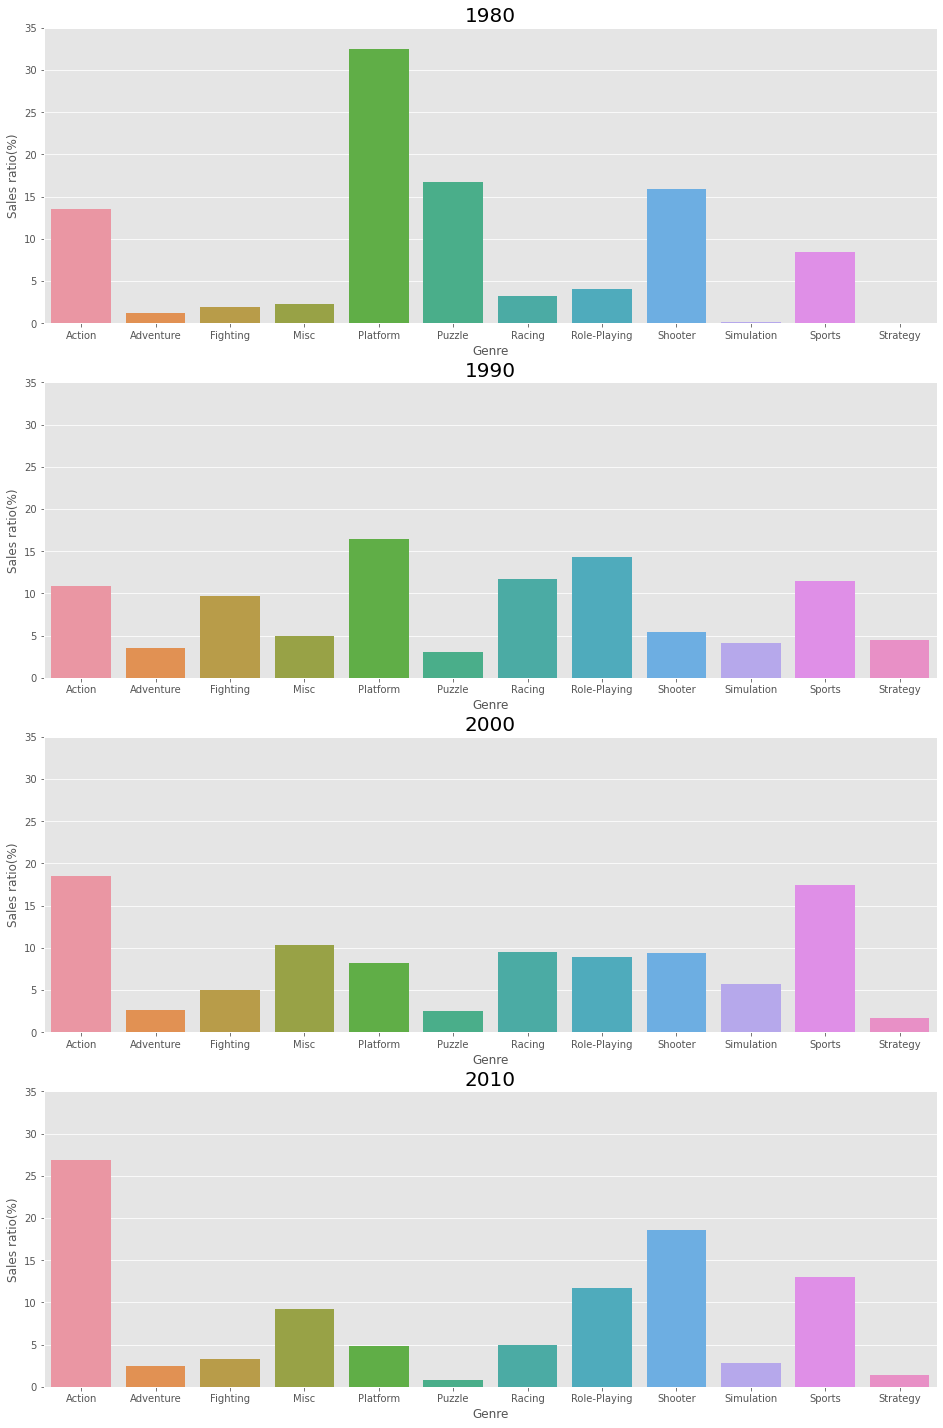

In [19]:
# 연도에 따른 장르별 판매량
fig, (ax1, ax2, ax3, ax4) = plt.subplots(figsize=(16,25), nrows=4)
sns.barplot(x = df_genre_n_decade_sales_ratio.index
            , y = df_genre_n_decade_sales_ratio[1980], ax = ax1)
sns.barplot(x = df_genre_n_decade_sales_ratio.index
            , y = df_genre_n_decade_sales_ratio[1990], ax = ax2)
sns.barplot(x = df_genre_n_decade_sales_ratio.index
            , y = df_genre_n_decade_sales_ratio[2000], ax = ax3)
sns.barplot(x = df_genre_n_decade_sales_ratio.index
            , y = df_genre_n_decade_sales_ratio[2010], ax = ax4)
ax1.set_title('1980', fontsize=20)
ax1.set_ylabel('Sales ratio(%)')
ax1.set_ylim(0, 35)
ax2.set_title('1990', fontsize=20)
ax2.set_ylabel('Sales ratio(%)')
ax2.set_ylim(0, 35)
ax3.set_title('2000', fontsize=20)
ax3.set_ylabel('Sales ratio(%)')
ax3.set_ylim(0, 35)
ax4.set_title('2010', fontsize=20)
ax4.set_ylabel('Sales ratio(%)')
ax4.set_ylim(0, 35)
plt.show()

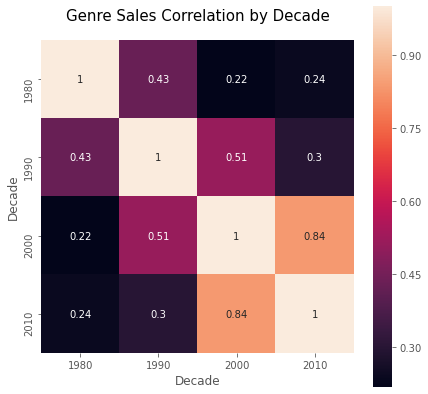

In [20]:
plt.figure(figsize=(7,7))
sns.heatmap(df_genre_n_decade_sales_ratio.corr(), square=True, annot=True)
plt.title('Genre Sales Correlation by Decade', fontsize=15, pad=20)
plt.show()

In [21]:
# 연도에 따른 장르별 판매량 분포 검정
pval_of_genre_decade_distbut = stats.chi2_contingency(df_genre_n_decade_sales_ratio)[1]
print('귀무가설 : 연도에 따른 장르별 판매량 분포는 차이가 없다.(트렌드가 없다)')
print('연도에 따른 장르별 판매량 chi^2 test 결과 p-value : {}'.format(pval_of_genre_decade_distbut))
print('-> p-value가 0.05보다 작기 때문에 귀무가설을 기각한다. 즉, 연도에 따른 장르별 판매량 분포는 유의미하게 다르며 연도별 게임의 트렌드가 있다.')
print()
print('''*결론
: 연도에 따라 게임 장르의 트렌드가 있기 때문에 게임 개발 시의 트렌드를 고려하여 장르를 선정한다.''')

귀무가설 : 연도에 따른 장르별 판매량 분포는 차이가 없다.(트렌드가 없다)
연도에 따른 장르별 판매량 chi^2 test 결과 p-value : 4.6626465984128724e-11
-> p-value가 0.05보다 작기 때문에 귀무가설을 기각한다. 즉, 연도에 따른 장르별 판매량 분포는 유의미하게 다르며 연도별 게임의 트렌드가 있다.

*결론
: 연도에 따라 게임 장르의 트렌드가 있기 때문에 게임 개발 시의 트렌드를 고려하여 장르를 선정한다.


---
# 궁금증 : 연도가 가까울수록 트렌드가 비슷할까?
- 모든 연도에 대해 상관계수를 구하고 연도 거리에 따라 상관계수가 어떻게 변하는지 확인하자

In [22]:
df_genre_n_year_sales = pd.pivot_table(df_for_year.groupby(['Genre', 'Year']).sum().reset_index()[['Genre', 'Year', 'Whole_Sales']]
                                        , index='Genre', columns='Year').Whole_Sales
df_genre_n_year_sales = df_genre_n_year_sales.fillna(0)

df_genre_n_year_sales_ratio = round(df_genre_n_year_sales / df_genre_n_year_sales.sum() * 100, 2)
df_genre_n_year_sales_ratio = df_genre_n_year_sales_ratio.fillna(0)
df_genre_n_year_sales_ratio

Year,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,...,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0
Genre,,,,,,,,,,,,,,,,,,,,,
Action,3.13,41.45,22.51,17.02,3.67,6.52,37.06,5.12,3.69,6.33,...,20.03,20.77,19.88,23.11,33.36,35.41,29.37,26.07,28.01,20.0
Adventure,0.00,0.00,0.00,2.38,0.00,0.00,0.00,20.18,0.00,0.00,...,3.68,3.10,2.80,3.08,1.63,1.87,1.81,3.06,2.53,0.0
Fighting,7.08,0.00,0.00,0.00,0.00,1.95,0.00,24.98,0.00,0.00,...,5.23,4.83,2.52,4.29,2.63,2.04,4.79,2.97,5.43,0.0
Misc,24.82,0.00,3.01,12.74,2.88,0.00,0.00,0.00,0.00,1.74,...,12.74,11.55,14.95,10.83,6.33,7.26,7.04,4.45,1.62,0.0
Platform,0.00,19.39,17.42,41.25,1.37,80.02,25.32,8.02,58.74,28.13,...,5.27,6.15,5.41,5.46,5.12,7.09,2.63,2.31,2.94,0.0
Puzzle,0.00,6.31,34.76,4.64,6.24,5.95,0.00,0.00,11.82,51.40,...,2.30,3.05,1.89,0.99,0.48,0.28,0.44,0.26,0.00,0.0
Racing,0.00,1.35,5.44,0.00,11.82,0.00,5.29,0.00,4.53,0.00,...,10.46,5.12,5.91,6.79,3.99,3.68,4.96,3.02,2.36,0.0
Role-Playing,0.00,0.00,0.00,0.00,0.00,0.00,6.80,21.43,12.45,3.00,...,8.82,7.20,11.94,10.36,13.19,8.64,13.61,13.91,9.53,80.0
Shooter,64.98,28.08,13.19,2.92,61.77,1.85,10.49,3.18,1.08,1.62,...,8.80,10.49,13.10,19.30,20.12,17.74,19.58,25.25,25.65,0.0


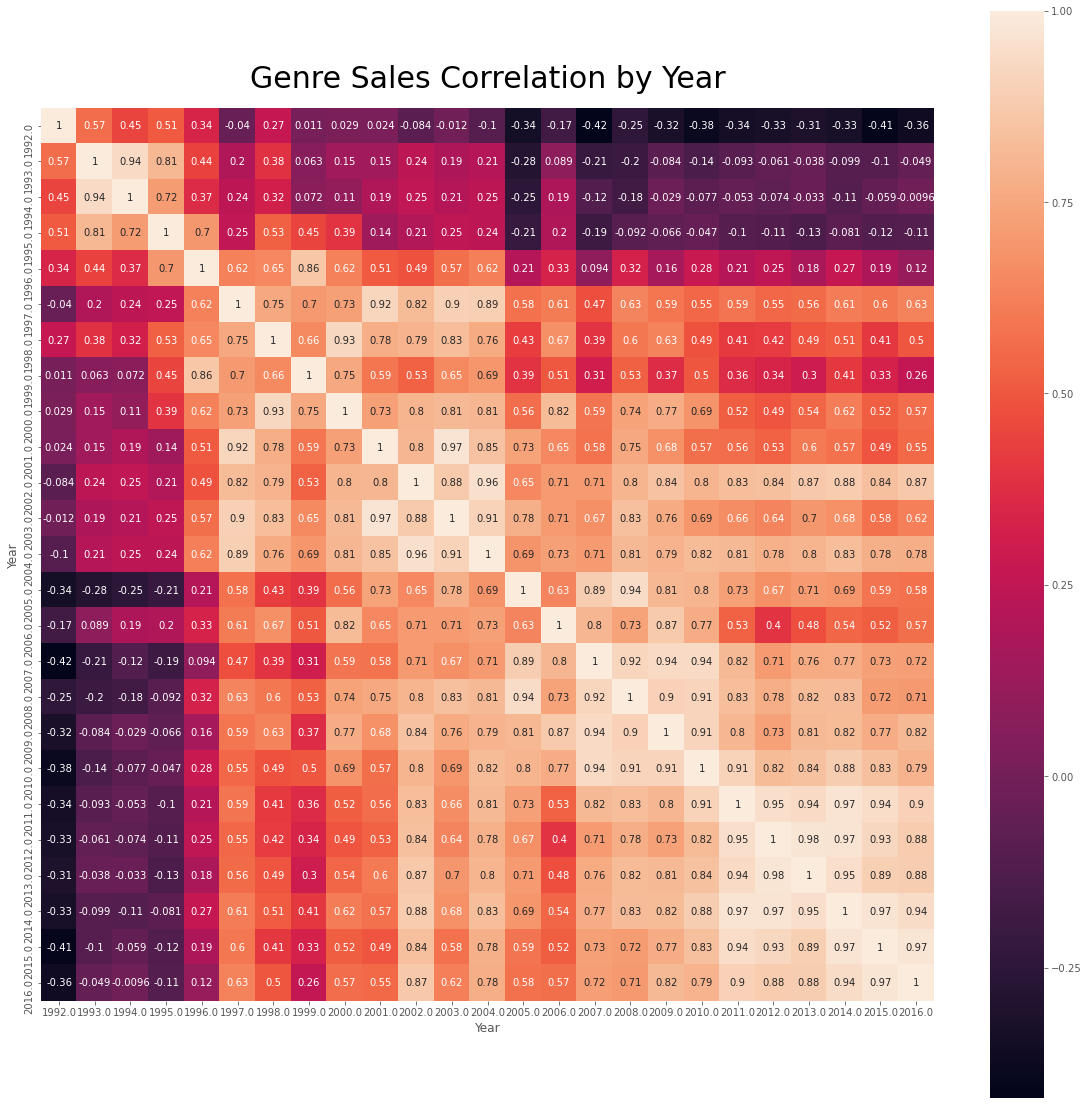

-> 대각에서 멀어질수록(연도의 차이가 커질수록) 상관관계가 낮아지는 경향 확인 가능


In [23]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_genre_n_year_sales_ratio.iloc[:, 12:-1].corr(), square=True, annot=True)
plt.title('Genre Sales Correlation by Year', fontsize=30, pad=20)
plt.show()

print('-> 대각에서 멀어질수록(연도의 차이가 커질수록) 상관관계가 낮아지는 경향 확인 가능')

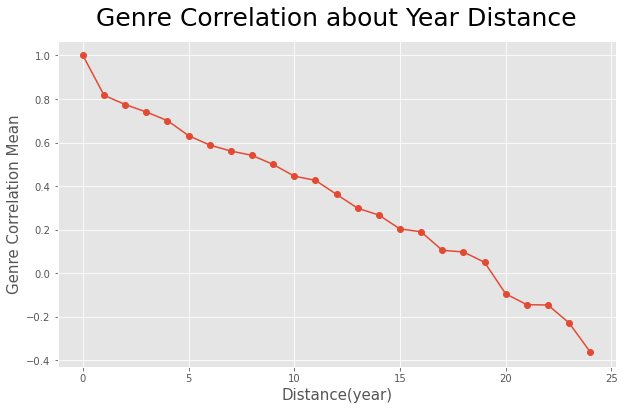

-> 연도의 차이가 클수록 장르별 판매량의 상관관계가 낮다.

즉, 미래의 게임장르 트렌드를 예측하고자 할 땐 가까운 연도의 트렌드를 파악하는 것이 좋다.
따라서 앞으로 0.6이상의 양의 상관관계를 보이는 5년 이내의 데이터만 활용해 현재 트렌드를 파악하도록 한다.


In [35]:
corr_year = df_genre_n_year_sales_ratio.iloc[:, 12:-1].corr()
mean_of_corr_by_year_distance = []
for i in range(len(corr_year)):
    temp = 0
    for j in range(len(corr_year) - i):
        temp += corr_year.iloc[j + i, j]
    mean_of_corr_by_year_distance.append(temp / (len(corr_year) - i))

plt.figure(figsize=(10, 6))
plt.plot(mean_of_corr_by_year_distance, '-o')
plt.title('Genre Correlation about Year Distance', fontsize=25, pad=15)
plt.xlabel('Distance(year)', fontsize=15)
plt.ylabel('Genre Correlation Mean', fontsize=15)
plt.show()

print('''-> 연도의 차이가 클수록 장르별 판매량의 상관관계가 낮다.

즉, 미래의 게임장르 트렌드를 예측하고자 할 땐 가까운 연도의 트렌드를 파악하는 것이 좋다.
따라서 앞으로 0.6이상의 양의 상관관계를 보이는 5년 이내의 데이터만 활용해 현재 트렌드를 파악하도록 한다.''')

# 필수컨텐츠 3 : 출고량이 높은 게임에 대한 분석

- 5년 이내의 데이터(2012~2016)를 활용.(2017년은 데이터가 너무 적어 2012년까지 포함)
- 출고량이 높은 상위 10% 게임을 대상으로 분석

In [25]:
# # Decade라는 column 추가
# df['Decade'] = df.Year.apply(decade_separator)
# df.Decade.head()

In [26]:
# 5년 내 게임 중 출고량 상위 10% 게임 지정
condition = (df.Whole_Sales > df.Whole_Sales.quantile(q = 0.9)) & (df.Year >= 2012)
df_high_sales = df[condition]
df_high_sales

# 판매량 상위 10% 게임의 전체 판매 비중
sales_ratio = df_high_sales.Whole_Sales.sum() / df[df.Year >= 2012].Whole_Sales.sum()
print('판매량 상위 10% 게임이 전체 판매량의 {:.2f}% 차지'.format(sales_ratio * 100))

판매량 상위 10% 게임이 전체 판매량의 60.62% 차지


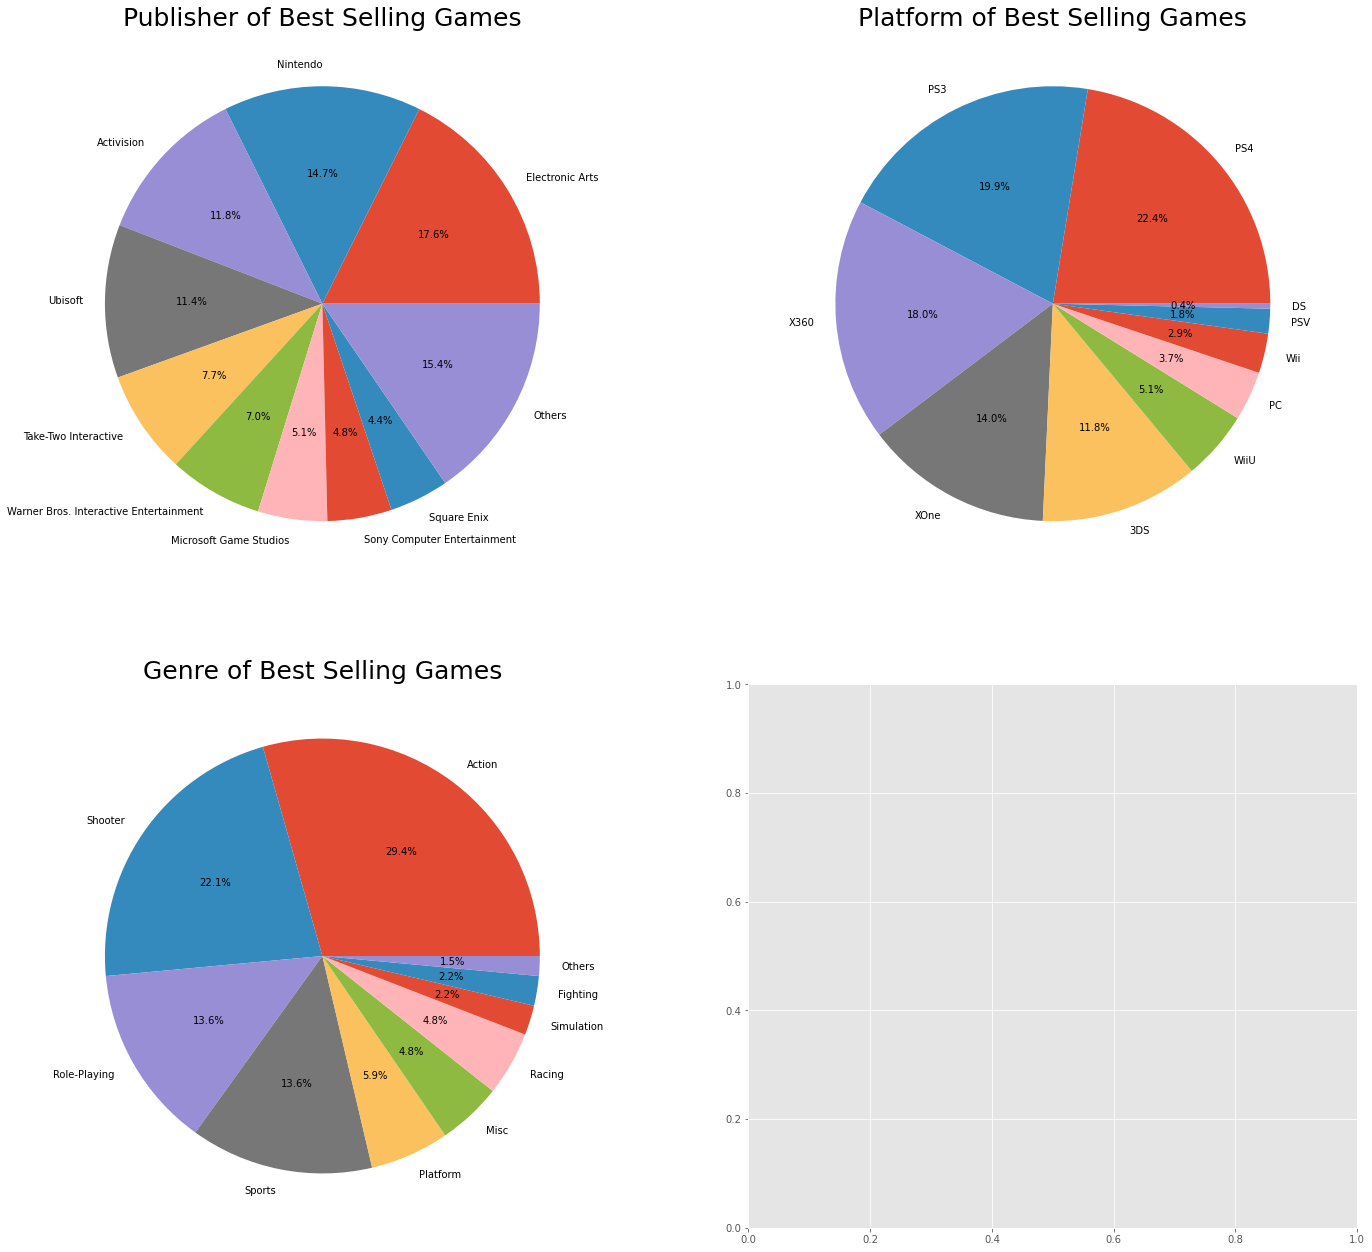

In [34]:
def make_category_count_simple(series, n = 10):
    '''카테고리를 value_counts한 series가 들어오면 n개만 남도록 하위 값들은 others 처리'''
    if len(series) <= n:
        return series
    res = series.head(n)
    res.iloc[-1] = res.iloc[-1] + sum(series.tail(len(series) - n))
    res.index = list(res.head(n-1).index) + ['Others']
    return res

cols = ['Publisher', 'Platform', 'Genre']
best_selling = [make_category_count_simple(df_high_sales[col].value_counts()) for col in cols]

fig, ax = plt.subplots(figsize=(24, 22), nrows=2, ncols=2)
for i in range(3):
    ax[i//2][i%2].pie(best_selling[i]
       , labels=best_selling[i].index, autopct='%1.1f%%')
    ax[i//2][i%2].set_title('{} of Best Selling Games'.format(cols[i]), fontsize=25)
plt.show()

# 궁금증 : 게임의 장르, 배급사, 플랫폼 중 어떤 항목이 판매량에 가장 큰 영향을 끼칠까?
- 분산을 비교한다.
    - 만약 장르에 따른 Sales의 분산이 작다면, 어떤 장르를 선택해도 판매량이 고만고만하다는 뜻. 반면, 분산이 크다면 어떤 장르를 고르느냐에 따라 Sales가 크게 달라진다는 뜻이다.
    -> 따라서, 각 항목의 Sales 분산을 구해 분산이 큰 항목의 카테고리를 우선 개발 방향으로 설정한다.

In [28]:
v_platform = round(np.var(df_high_sales.groupby('Platform').sum().Whole_Sales), 2)
v_publisher = round(np.var(df_high_sales.groupby('Publisher').sum().Whole_Sales), 2)
v_genre = round(np.var(df_high_sales.groupby('Genre').sum().Whole_Sales), 2)
pd.DataFrame({'V(Genre)' : [v_genre]
              , 'V(Platform)' : [v_platform]
              , 'V(Publisher)' : [v_publisher]})

,V(Genre),V(Platform),V(Publisher)
0,6456.91,4922.17,2315.47


---
<br/>
Genre의 분산이 가장 크고 Publisher의 분산이 가장 작다.
즉, Publisher는 어느 곳을 골라도 판매량에 큰 차이가 없지만 Genre는 어떤 장르를 고르느냐에 따라 판매량에 큰 차이가 난다.  
<br/><br/>
-> 따라서 Genre들 중 가장 많은 판매량이 나온 'Action'을 개발하는 게임의 장르로 선택하고, Action 장르 게임의 배급사와 플랫폼의 특징을 조사한다.
<br/><br/>

---


In [29]:
df_high_sales_action = df_high_sales[df_high_sales.Genre == 'Action']

# Action 장르의 경우 미국과 유럽의 판매량이 매우 크다.
df_high_sales_action.groupby('Genre').sum().iloc[:, 1:5]

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,97.07,93.05,14.52,31.83


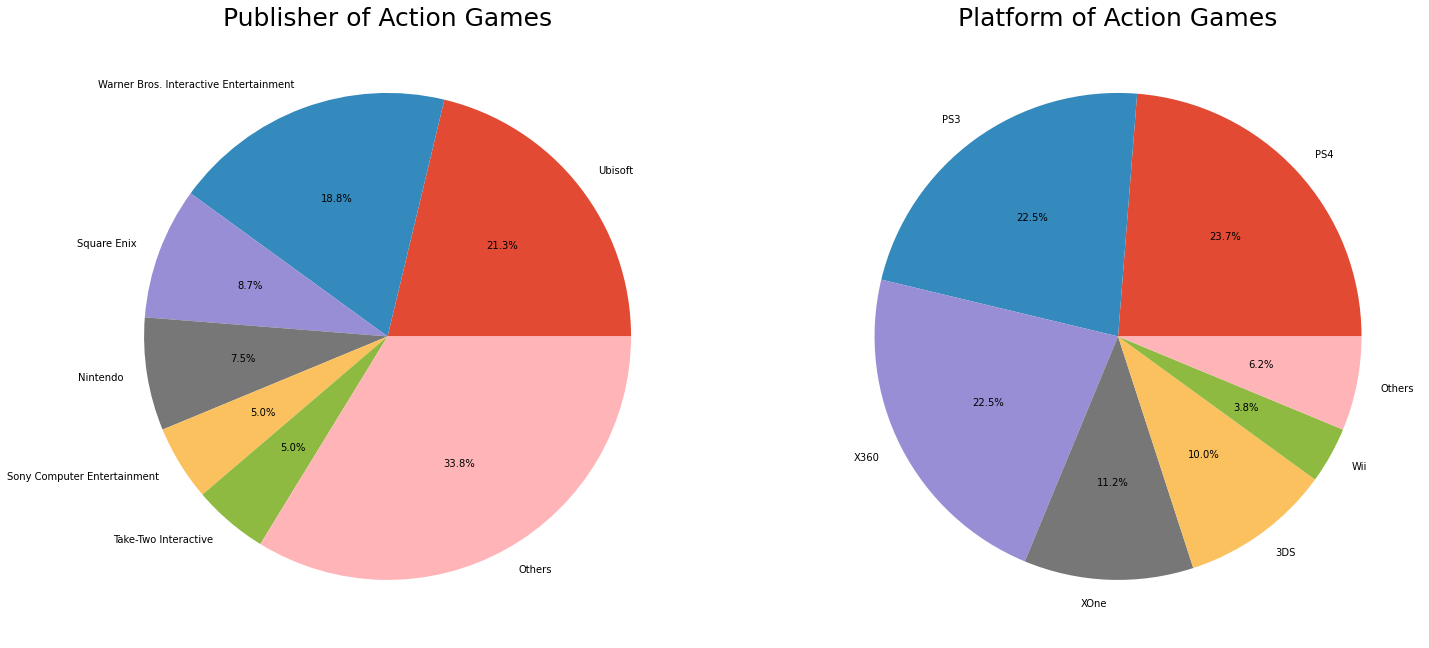

Action 장르 게임은 'Ubisoft'라는 배급사가 가장 뛰어난 판매 실적을 보이므로, Ubisoft를 배급사로 결정한다.
그리고 플랫폼의 경우 PS4, PS3, X360이 큰 차이가 없는 점유율을 보인다. 개발 여유가 된다면 PS4, PS3, X360 모든 플랫폼에 출시하는 것이 좋을 것으로 판단되지만, 하나의 플랫폼밖에 출시하지 못한다면 가장 점유율이 높은 PS4에 출시하거나, PS4와 XOne(X360의 후속모델)에 출시하는 것이 좋을 것으로 판단된다.
추가로, Action 장르의 경우 미국과 유럽의 판매량이 가장 높기 때문에 영어로 즐길 수 있도록 개발하는 것이 유리하다.


In [33]:
col = ['Publisher', 'Platform']
best_selling_action = [make_category_count_simple(df_high_sales_action[col].value_counts(), 7) for col in cols]

fig, ax = plt.subplots(figsize=(24, 22), ncols=2)
for i in range(2):
    ax[i].pie(best_selling_action[i]
           , labels=best_selling_action[i].index, autopct='%1.1f%%')
    ax[i].set_title('{} of Action Games'.format(cols[i]), fontsize=25)
plt.show()

print('''Action 장르 게임은 'Ubisoft\'라는 배급사가 가장 뛰어난 판매 실적을 보이므로, Ubisoft를 배급사로 결정한다.
그리고 플랫폼의 경우 PS4, PS3, X360이 큰 차이가 없는 점유율을 보인다. 개발 여유가 된다면 PS4, PS3, X360 모든 플랫폼에 출시하는 것이 좋을 것으로 판단되지만, 하나의 플랫폼밖에 출시하지 못한다면 가장 점유율이 높은 PS4에 출시하거나, PS4와 XOne(X360의 후속모델)에 출시하는 것이 좋을 것으로 판단된다.
추가로, Action 장르의 경우 미국과 유럽의 판매량이 가장 높기 때문에 영어로 즐길 수 있도록 개발하는 것이 유리하다.''')

---
# 결론
- 트렌드를 반영하기 위해 최근 5년 내 게임들 중 출고량이 높은 상위 10% 게임을 분석한 결과
    - 게임 장르 : Action
    - 배급사    : Ubisoft
    - 플랫폼    : PS4
    - 언어      : 영어  
    로 출시하는 것이 판매량을 높일 수 있을 것으로 판단된다.